This notebook visualizes state evolution for the box-ball soliton cellular automaton. The evolution rule for this model is described in the introduction to [this survey paper](https://arxiv.org/abs/1109.5349).

In this notebook, a state of the system is represented as a Boolean array, with each Boolean value indicating whether there is a box in that spot.

The `evolve` function below implements the update rule using two pointers: One to keep track of the position the ball is being grabbed from, and one to keep track of where the balls are being placed in the new state.

In [1]:
def evolve(input_row,pre_trimmed=False):
    #Given one row, evolve the next row.
    #Row is represented as list of True and False.
    row=input_row
    
    if not pre_trimmed:
        while not row[-1] and len(row)>0:
            row.pop()
    if len(row)==0:
        return row
    
    n=len(row)
    grab=0 #Pointer for where ball will be grabbed from.
    place=-1 #Pointer for where ball can be placed.
    
    #The new row will be at most twice the length of the previous row.
    new_row=[False for i in range(2*n)]
    
    while grab<n:
        while not row[grab]:
            #Look for a ball in the given row.
            grab +=1
        place=max(place+1,grab+1) #This is the earliest possible spot a ball can be placed.
        while place<n and row[place]:
            #Look for an empty spot to place the ball.
            place +=1
        new_row[place]=True
        grab +=1
        
    return new_row[:place+1]

State evolution can be visualized as a 2D image, where each row represents the state at a particular time, with black pixels representing the positions of the balls. After some image display code and helper functions are defined in the cell below, there are some examples further down.

In [2]:
from PIL import Image
from IPython.display import display
import random
import numpy as np

def convert_list_of_rows(list_of_rows, max_length=None):
    #Converts a list of boolean rows of varying length
    #into a list of 0-1 rows of uniform length. 
    #By default the width is the length of the longest row,
    #but if a max_length is set then the rows will be truncated.
    #This can be used if a diagram would be too wide to display.
    n = len(list_of_rows[-1])
    if max_length is None:
        max_length=n
    new_list_of_rows=[]
    for r in list_of_rows:
        new_row=[int(b) for b in r[:max_length]]
        m=len(new_row)
        new_row.extend([0 for i in range(max_length-m)])
        new_list_of_rows.append(new_row)
    return new_list_of_rows

def create_list_of_rows(initial, n):
    #Given an initial row, creates a list of n rows by evolving.
    row=initial
    list_of_rows=[row]
    row=evolve(row)
    list_of_rows.append(row)
    for i in range(n-2):
        row=evolve(row, True)
        list_of_rows.append(row)
    return list_of_rows

def display_01_array(z1_array):
    #z1_array should be an array of 0s and 1s. This will function will
    #display the array with 1s as black pixels and 0s as white ones.
    pil_im=Image.fromarray(((1-z1_array)*255).astype('uint8'), mode="P")
    display(pil_im)
    
def random_row(width, p = 0.5):
    #Returns a random 0-1 row, where each position has probability p of having value 1.
    row=random.choices([False,True], weights=[1-p,p], k=width)
    return row

def row_from_list(list_of_ints):
    #Takes as input a list of integers. The integers represent the lengths of blocks of cells with and without balls.
    #For example, this turns [2,1,3] into a state where there are 2 cells with balls, followed by 1 empty cell,
    #then followed by 3 cells with balls.
    b=True
    row=[]
    for i in list_of_ints:
        row.extend([b for j in range(i)])
        b=not b
    return row
    
def draw_SCA(initial, height,width=None):
    image_array=np.array(convert_list_of_rows(create_list_of_rows(initial,height),width))
    display_01_array(image_array)

This example shows a soliton of length 5 meeting a soliton of length 1, and the result of their interaction.

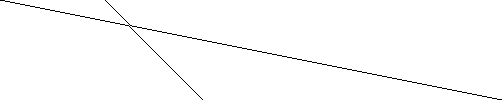

In [3]:
draw_SCA(row_from_list([5,100,1]),100)

This example shows a soliton of length 2 interacting with 20 solitons of length 1.

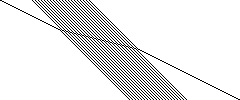

In [4]:
draw_SCA(row_from_list([2,30]+[1,2]*20),100)

This example shows 10 solitons ranging in size from 10 to 1 arranged in decreasing order, interacting, with the result being 10 solitons of the same sizes, but in increasing order from left to right.

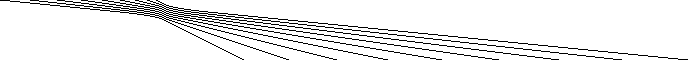

In [5]:
l=[]
for i in range(10,1,-1):
    l.append(i)
    l.append(2*i)
row=row_from_list(l)
draw_SCA(row,60,700)

The next two examples show the evolution of randomized initial states.

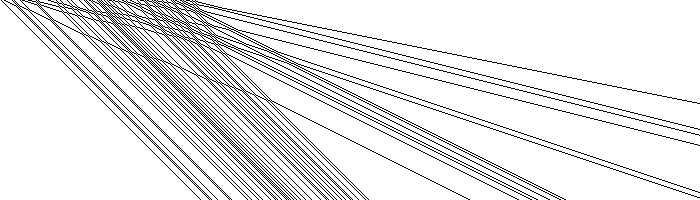

In [26]:
draw_SCA(random_row(200,0.3),200,700)

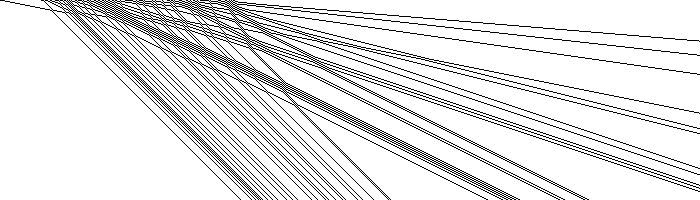

In [9]:
draw_SCA(row_from_list([5,30])+random_row(200,0.5), 200,700)